In [1]:
from random import random, uniform
from math import log, floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def exp(l, u):#Экспоненциальное распределение
    return (-1*l)*log(u)

def demand(u):#Спрос
    if u < 1/6:
        return 1
    elif u >= 1/6 and u < (1/6 + 1/3):
        return 2
    elif u >= (1/6 + 1/3) and u < (1/6 + 2/3):
        return 3
    else:
        return 4
    
def normal(x, a, b):#время доставки (в данном случае посчитает от полу месяца до месяца)
    return (x-a)/(b-a)

In [3]:
l = 0.1#0.1 месяц
S_mas = [40, 60, 80, 100, 60, 80, 100, 80, 100]
s_0_mas = [20, 20, 20, 20, 40, 40, 40, 60, 60]
K = 32 #покупная стоимость
price = 3#дополнительные затраты

X = []# Х для графика 
X_gen = []
Y = []# Y для графика 
Y_gen = []

In [4]:
for generations in range(1):
    best_strategy = ''
    best_zatrat = 0
    
    X_gen.append([])
    Y_gen.append([])
    for number in range(len(S_mas)): #len(S_mas)
        S = S_mas[number]
        s_0 = s_0_mas[number]

        t_nak = 0#Время
        t_zakaz = 0#Время доставки
        m_zatr = 0#Затраты
        h = 0#Затраты на хранение
        Z = 0
        mas_zatr = []

        I_current = S

        i = -1
        buf = []
        
        flag_z = False
        
        Nal_mas = []
        
        df = pd.DataFrame([], columns=["Месяц", "Наличие", "Купили", "Заказали", "Время прихода товара"])
        while t_nak < 120:
            u = random()
            t_come = exp(l, u)#Время появления клиента

            t_nak += t_come#Общее время
            buf.append(t_nak)

            if t_nak > t_zakaz and flag_z:
                I_current += Z
                flag_z = False

            d_current = demand(u)#Сколько спрос
            I_current -= d_current#Сколько осталось
            Nal_mas.append(I_current)
            if len(buf) > 1:
                if floor(buf[len(buf)-1]) > floor(buf[len(buf)-2]):
                    t_prih = uniform(0.5,1)
                    if floor(t_nak + t_prih) > floor(buf[len(buf)-1]):
                        t_prih -= t_nak - floor(t_nak)
                        t_zakaz = t_nak + t_prih
                    else:
                        t_zakaz = t_nak + t_prih
                    flag_z = True
                    
                    if I_current < s_0:
                        Z = S - I_current# сколко надо заказать
                    else:
                        Z = 0
                    if I_current > 0:
                        h = I_current * 1
                    else:
                        h = abs(I_current) * 5
                    m_zatr += K + price * Z + h
                    mas_zatr.append(m_zatr)
                
            df2 = pd.DataFrame([[t_nak, I_current + d_current, d_current, Z, t_zakaz]], columns=["Месяц", "Наличие", "Купили", "Заказали", "Время прихода товара"])
            df = df.append(df2, ignore_index=True)
        
        df.to_excel(f"output gen-{generations+1} var-{number+1}.xlsx")
        
        mean_zatr = round(np.mean(np.array(mas_zatr)), 2)
        if best_zatrat == 0 or best_zatrat > mean_zatr:
            best_strategy = "Поколение " + str(generations+1) + ", S=" + str(S) + ", s=" + str(s_0) + ", средние затраты:" + str(mean_zatr)
            best_zatrat = mean_zatr
        X_gen[generations].append(number+1)
        Y_gen[generations].append(mean_zatr)
    
    
    X.append(generations+1)
    Y.append(best_zatrat)
    print(best_strategy)

Поколение 1, S=40, s=20, средние затраты:7082.65


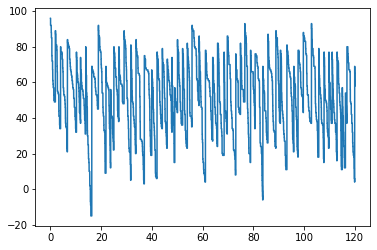

In [5]:
plt.step(buf, Nal_mas, where='post')
plt.show()